## 1. Introduction

Fluctuations in Earth's temperature has been one of the most intensly researched areas by climate analysts for decades, with a current rising trend projecting an increase in global temperatures up to 4.8 degrees under a high-emission scenario (IPCC, 2013). The Intergovernmental Panel on Climate Change (IPCC) has investigated the projected impacts of a 1.5 degree rise in global temperatures above pre-industrial levels, and found that surpassing this threshold would significantly heighten the risk of severe climate impacts. These include more frequent extreme heatwaves, precipitation events, and threats to ecosystems and the life which inhabit them (IPCC, 2013). This project examines data from the Community Earth System Model (CESM) Large Ensemble Project which provides variables such atmospheric conditions, precipitation rate, and our target variables surrounding global temperature. By analysing this dataset, we aim to uenhance our understanding of historical and projected temperature trends, their association with extreme heat events, and their underlying drivers. 

The objectives of this study are as follows: (1) To investigate the temporal trend of daily mean temperature in the study area；(2) To analyze the variation in daily maximum temperature and identify potential future extreme heat events；(3) To explore the factors contributing to extreme heat events.

## 2. Methodology

Prior to data exploration and manipulation, the data was preprocessed to check for null values, convert timestamps into useable datetime objects, and identify anomalies. 

To investigate the long-term trend of daily mean temperature (TREFHT) in the study area, a comprehensive data analysis approach was employed, comprising the following three key components: 

(1) The 30-day moving average and 365-day moving average were plotted to analyze the variation in daily mean temperature over the period 2006–2080. These techniques help identify the periodic fluctuations in temperature and reveal long-term trends.

(2) To quantitatively assess the warming trend, the annual mean temperature was computed, and a linear regression model was employed to estimate the rate of temperature change over time. 

(3) To examine variations in seasonal temperature patterns, the monthly mean temperature was calculated and compared between the historical period (before 2024) and the future period (after 2024). This comparative analysis allows for the identification of temperature changes in specific months, thereby enabling a more accurate assessment of future climate impacts. 


Furthermore, a data-driven approach was utilized to evaluate the trend of daily maximum temperature (TREFMXAV_U) and identify potential future extreme heat events in the study area. The analysis consists of the following three components: 

(1) The 30-day and 365-day moving average methods were plotted to analyze the daily maximum temperature trends from 2006 to 2080, providing insights into seasonal and long-term variations.

(2) To quantify the long-term trends in annual mean maximum temperature and annual maximum temperature, the daily maximum temperature data was aggregated at an annual scale, and a linear regression model was used to analyze the trend. This approach allows for the quantification of long-term changes in maximum temperature and enables the assessment of whether the rate of increase in extreme heat events exceeds that of overall temperature changes. 

(3) To identify potential future extreme heat events, a threshold-based classification was applied. Specifically, Extreme Heat Days were defined as days when the daily maximum temperature exceeds 305K. Severe Heat Days were identified as days when the daily maximum temperature exceeds 308K. The annual frequency of extreme heat events was computed, and a time-series bar chart was generated to visualize the temporal evolution of heat events. This methodology provides a comprehensive framework for evaluating long-term temperature trends and the increasing occurrence of extreme heat events, contributing to a better understanding of future climate change impacts.

Finally, this project employs a data-driven approach to evaluate the driving factors of extreme heat events. The analysis consists of the following four components:

(1) Pearson and Spearman correlation analyses are applied to examine both linear and nonlinear relationships between various meteorological variables and daily maximum temperature (TREFMXAV_U). The seasonal variations of these correlations are assessed across four seasons (spring, summer, autumn, and winter) to identify key factors influencing daily maximum temperature and to reveal how seasonal factors modulate extreme heat events.

(2) The probability density distributions of key meteorological variables are compared between extreme heat days and normal days. This approach allows for the evaluation of distributional characteristics under extreme heat conditions and facilitates the identification of meteorological factors that play a critical role in the occurrence of extreme heat events.

(3) Correlation coefficients between meteorological variables and daily maximum temperature are specifically examined under extreme heat conditions. The objective is to quantify the influence of different meteorological factors on extreme heat events and to identify primary drivers contributing to temperature extremes.

(4) The year 2058, characterized by the occurrence of severe heat events, and the year 2071, with the highest frequency of extreme heat events, are selected as representative years. The daily variations of key meteorological variables within 30 days before and after extreme heat events are analyzed to validate the findings and enhance the understanding of the evolution of extreme heat events at a daily scale.

## 3. Study area and data

### 3.1 Study area

The study area, situated between Manchester and Liverpool in northwest England, has a temperate oceanic climate, influenced by the Atlantic Ocean and the westerly wind belt. The climate is mild and humid, with small temperature variations and evenly distributed precipitation. The annual average temperature is approximately 284 K, and the annual precipitation slightly exceeds 800 mm. The average relative humidity is close to 80%, particularly noticeable in winter, leading to frequent fog formation. Due to the influence of the Atlantic Ocean and the Irish Sea, westerly winds are common, with occasional strong winds in winter (Carter et al., 2015; Hall et al., 2012).

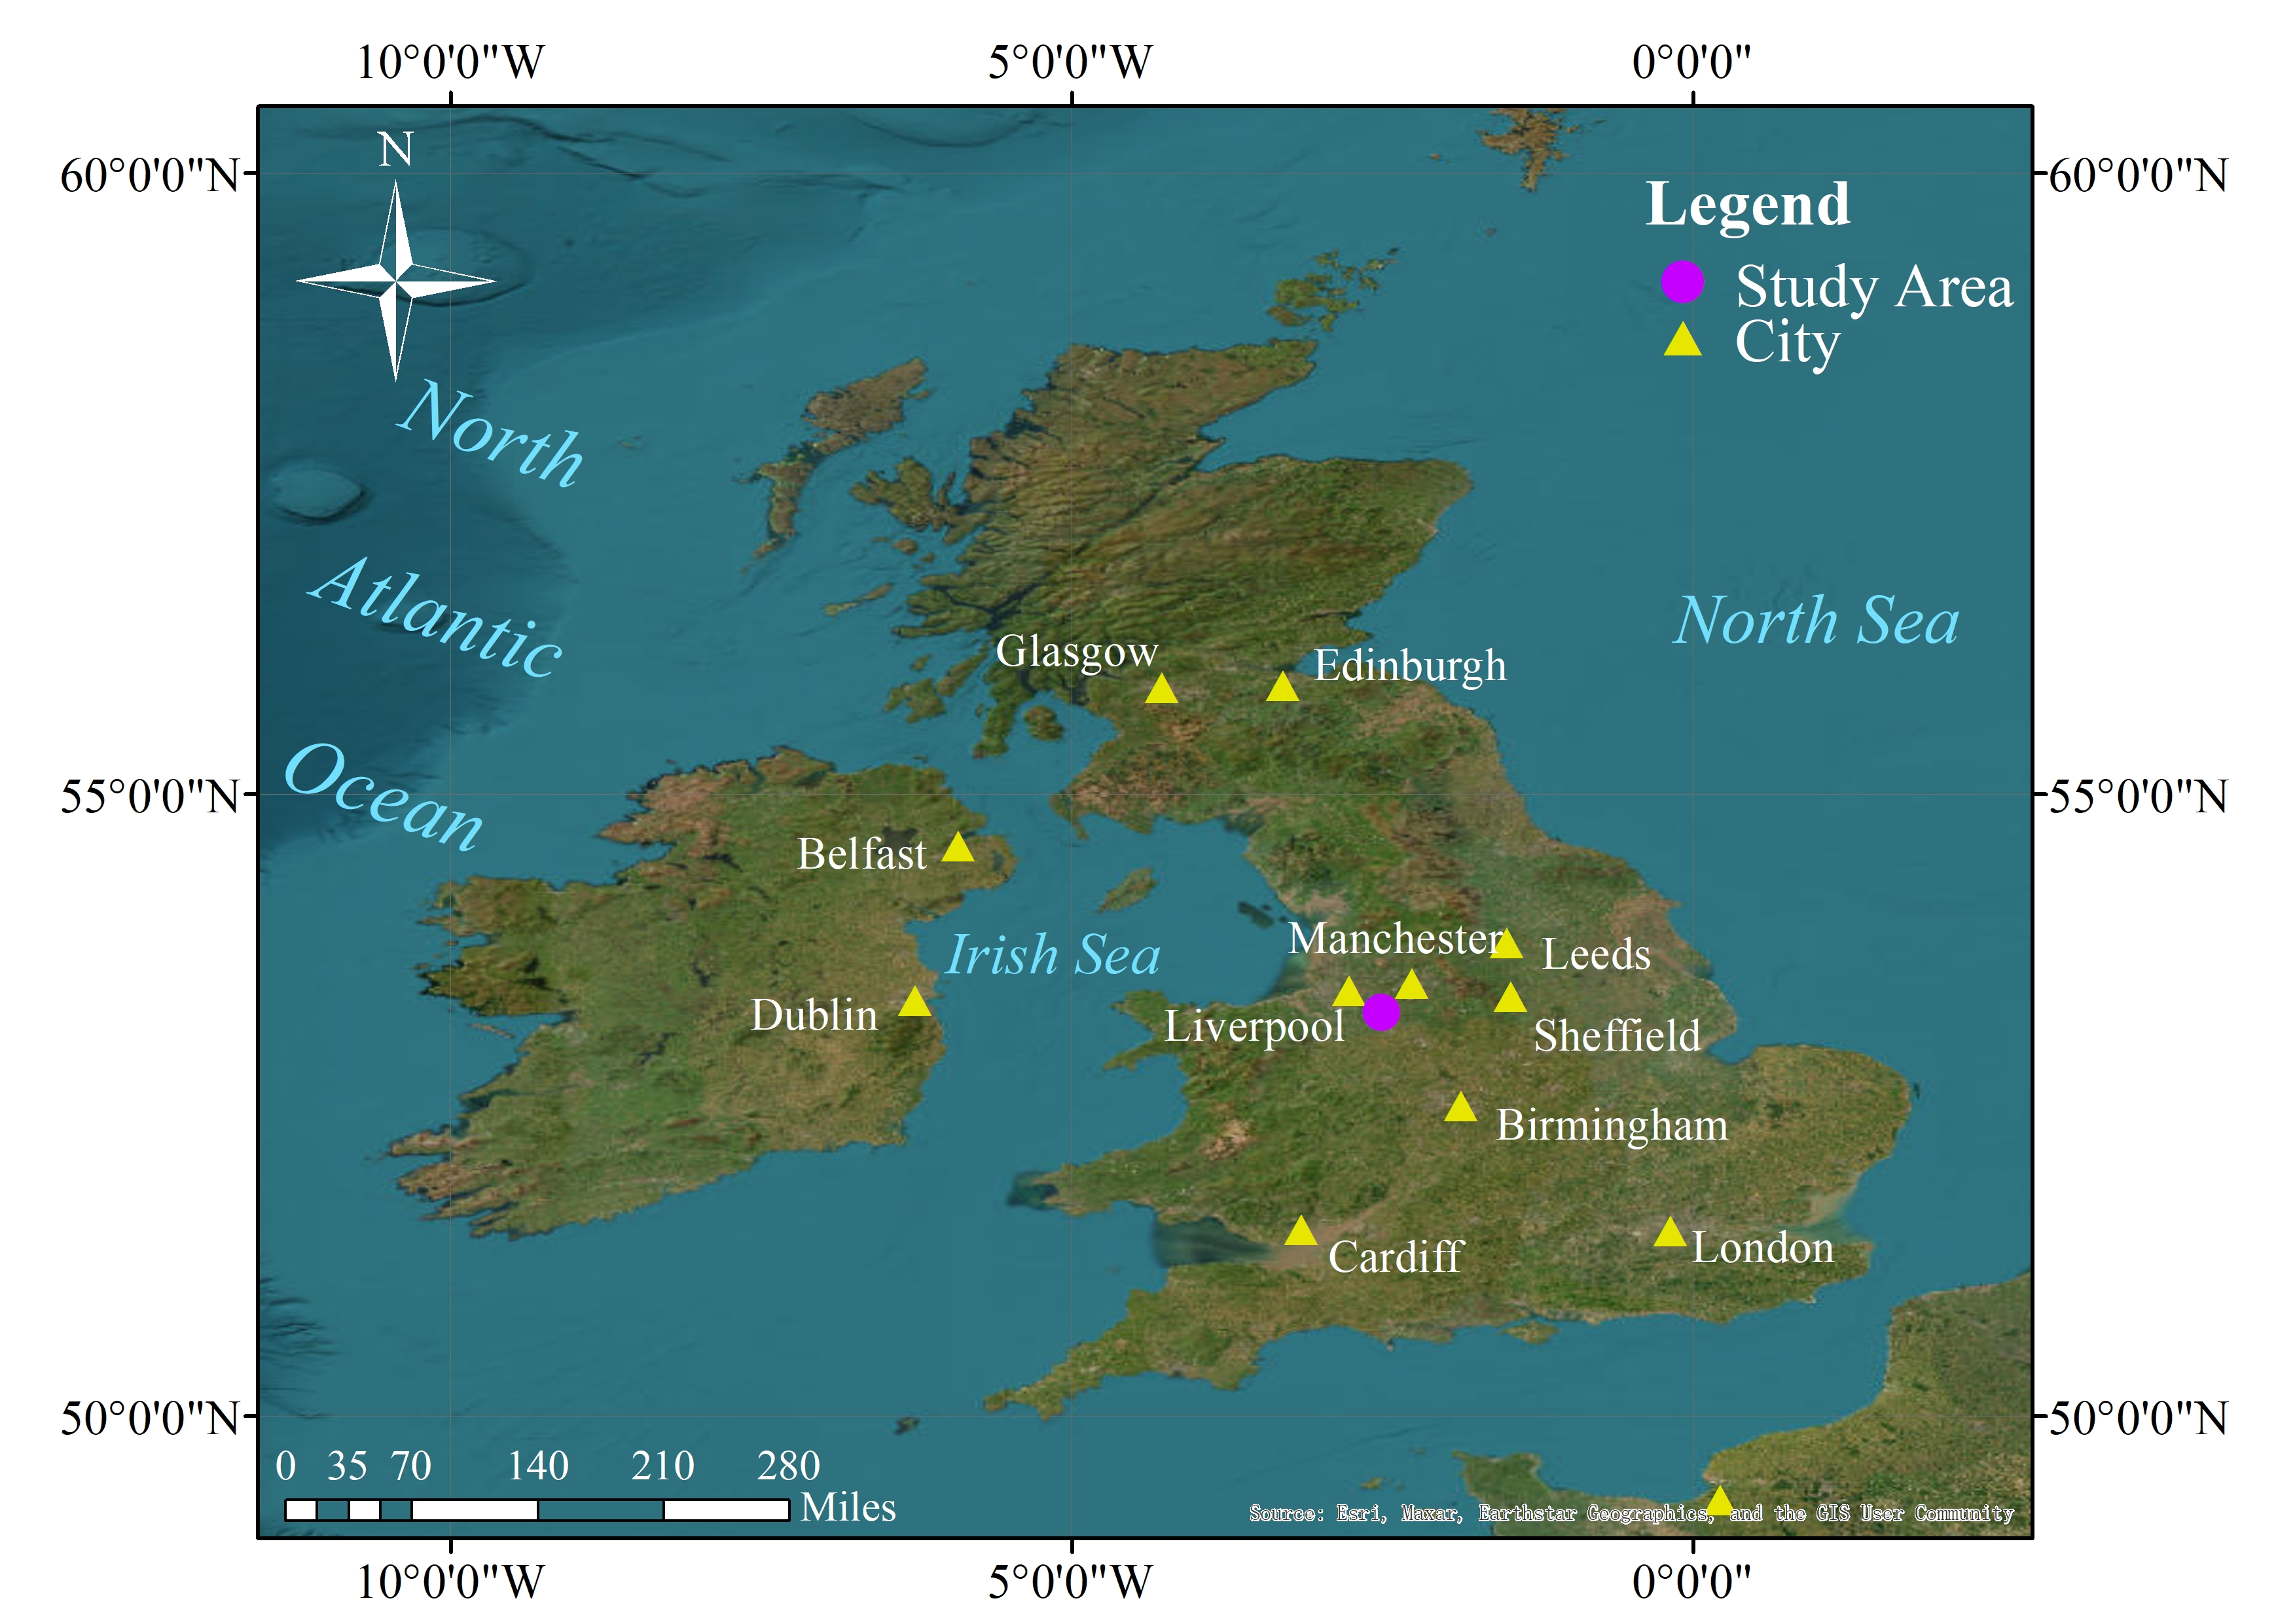

#### Fighre 1. The location of the study area.

### 3.2 Data description

In [11]:
import pandas as pd

climate_data = pd.read_csv('project_1.csv')

# Display information
climate_data

EmptyDataError: No columns to parse from file

The data is obtained from the Community Earth System Model (CESM) at a daily scale (Kay et al., 2015). The time range spans from January 2, 2006, to December 31, 2080. The descriptions of each field are as follows:

TREFMXAV_U (K)：Urban daily maximum of average 2-m temperature

FLNS (W/m2): Net longwave flux at surface

FSNS (W/m2): Net solar flux at surface

PRECT (m/s): Total (convective and large-scale) precipitation rate (liq + ice)

PRSN (kg/m²/s): the snow-only precipitation rate at the surface, excluding rain and other hydrometeors

QBOT (kg/kg): Lowest model level water vapor mixing ratio

TREFHT (K): Reference height temperature

UBOT (m/s): Lowest model level zonal wind. Positive value: Wind blows eastward (westerly wind); Negative value : Wind blows westward (easterly wind)

VBOT (m/s): Lowest model level meridional wind. Positive value: Wind blows northward (southerly wind); Negative value : Wind blows southward (northerly wind)

lat: latitude

lon: longitude

### 3.3 Data preprocessing

##### Processing and indexing time data

In [2]:
# Change datatype to datetime
climate_data['time'] = pd.to_datetime(climate_data['time'], errors='coerce')

In [3]:
# set "time" to index
climate_data.set_index('time', inplace=True)  

In [ ]:
# Display data
climate_data

TREFMXAV_U       FLNS       FSNS         PRECT          PRSN  \
time                                                                       
2006-01-02   282.77585  41.925180  25.926952  4.660000e-09  4.780000e-17   
2006-01-03   284.47113   8.905806  10.946910  8.050000e-08  1.300000e-16   
2006-01-04   284.28796  16.511415   6.405902  2.910000e-09  4.090000e-16   
2006-01-05   282.12110  29.948362   9.315041  7.430000e-11  0.000000e+00   
2006-01-06   280.89090  19.064156   7.941241  6.890000e-12  0.000000e+00   
...                ...        ...        ...           ...           ...   
2080-12-27   286.85907  55.167490  30.543959  4.770000e-08  0.000000e+00   
2080-12-28   285.20993  33.668793  15.180238  1.050000e-08  0.000000e+00   
2080-12-29   285.51710  20.443943  15.585098  1.590000e-09  0.000000e+00   
2080-12-30   283.79187  33.174114  18.295568  9.270000e-12  0.000000e+00   
2080-12-31   283.19278  14.260359   8.917209  2.530000e-10  0.000000e+00   

                QBOT     TREFHT      UBOT      VBOT        lat    lon  
time                                                                   
2006-01-02  0.004769  279.14288  3.878579  1.394184  53.246075  357.5  
2006-01-03  0.006271  281.14865  1.788157  3.821703  53.246075  357.5  
2006-01-04  0.005782  281.22380  0.804845 -2.299140  53.246075  357.5  
2006-01-05  0.004277  278.39767 -1.100267 -1.258029  53.246075  357.5  
2006-01-06  0.003990  278.06378 -0.706321 -0.938421  53.246075  357.5  
...              ...        ...       ...       ...        ...    ...  
2080-12-27  0.006020  281.25858  1.665078 -1.866844  53.246075  357.5  
2080-12-28  0.005895  279.74475 -0.422336  2.654144  53.246075  357.5  
2080-12-29  0.006381  283.24332  0.827862  3.980862  53.246075  357.5  
2080-12-30  0.005410  280.88852  0.223743  3.058934  53.246075  357.5  
2080-12-31  0.005427  280.81763  1.719592  0.591586  53.246075  357.5  

[27374 rows x 11 columns]

##### Check for missing values

In [5]:
# Missing values
missing_values = climate_data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
TREFMXAV_U    0
FLNS          0
FSNS          0
PRECT         0
PRSN          0
QBOT          0
TREFHT        0
UBOT          0
VBOT          0
lat           0
lon           0
dtype: int64


The dataset has no missing values.

##### Check for duplicate rows

In [6]:
# Duplicates
duplicates = climate_data[climate_data.duplicated()]
print(f"Duplicate rows: {len(duplicates)}")

Duplicate rows: 0


There are no duplicate rows in the dataset.

##### Check the number of negative values

In [7]:
# Count the number of negative values in each column
negative_counts = (climate_data < 0).sum()

# Print the count
negative_counts

TREFMXAV_U       0
FLNS             0
FSNS             0
PRECT            1
PRSN          1048
QBOT             0
TREFHT           0
UBOT          9396
VBOT          8855
lat              0
lon              0
dtype: int64

There is 1 anomaly in PRECT, and 1048 anomalies in PRSN.

##### Replace negative PRECT values with 0

In [8]:
# PRECT cant be negative. Replace negative PRECT to 0

# Replace negative PRECT values with 0
climate_data.loc[(climate_data['PRECT'] < 0), 'PRECT'] = 0

# Verify the fix
negative_entries_after = climate_data[(climate_data['PRECT'] < 0)]
print(f"Number of negative PRECT after fix: {len(negative_entries_after)}")

Number of negative PRECT after fix: 0


##### Replace negative PRSN to 0

In [9]:
# PRSN cant be negative. Replace negative PRSN to 0

# Replace negative PRSN values with 0
climate_data.loc[(climate_data['PRSN'] < 0), 'PRSN'] = 0

# Verify the fix
negative_entries_after = climate_data[(climate_data['PRSN'] < 0)]
print(f"Number of negative PRSN after fix: {len(negative_entries_after)}")

Number of negative PRSN after fix: 0


##### Check for anomalous records in TREFMXAV_U and TREFHT

In [10]:
# The value of TREFMXAV_U must be greater than TREFHT.

# Calculate the difference between TREFMXAV_U and TREFHT
climate_data["diff"] = climate_data["TREFMXAV_U"] - climate_data["TREFHT"]

# Filter values where the difference is less than 0
negative_values = climate_data[climate_data["diff"] < 0]

# Count the number of negative values
negative_count = negative_values.shape[0]

# Print the count of negative values
print("Number of anomalous records:", negative_count)

# Remove the added column
climate_data.drop(columns=["diff"], inplace=True)

Number of anomalous records: 0


There are no anomalous records in TREFMXAV_U and TREFHT.

### 3.4 Data summary statistics

In [11]:
climate_data.describe()

TREFMXAV_U          FLNS          FSNS         PRECT          PRSN  \
count  27374.000000  27374.000000  27374.000000  2.737400e+04  2.737400e+04   
mean     288.836179     42.995679     97.026261  3.379656e-08  3.049255e-10   
std        5.246468     21.451927     75.062880  4.986414e-08  4.704584e-09   
min      274.153200      0.611385      2.819259  0.000000e+00  0.000000e+00   
25%      284.719465     26.157544     31.037187  2.130000e-09  0.000000e+00   
50%      288.299895     40.777005     78.443183  1.310000e-08  1.210000e-21   
75%      292.869525     57.113572    149.332133  4.637500e-08  2.350000e-16   
max      311.257260    111.851400    310.191700  7.750000e-07  2.330000e-07   

               QBOT        TREFHT          UBOT          VBOT           lat  \
count  27374.000000  27374.000000  27374.000000  27374.000000  2.737400e+04   
mean       0.006523    284.876413      1.176320      1.503084  5.324608e+01   
std        0.002126      4.992277      3.066843      2.940138  1.659148e-11   
min        0.001855    268.938400     -9.739025     -8.991429  5.324607e+01   
25%        0.004860    280.987885     -1.085982     -0.766405  5.324607e+01   
50%        0.006211    284.537575      1.488009      1.593354  5.324607e+01   
75%        0.007947    288.900110      3.390555      3.634500  5.324607e+01   
max        0.015222    303.117980     10.234506     11.178102  5.324607e+01   

           lon  
count  27374.0  
mean     357.5  
std        0.0  
min      357.5  
25%      357.5  
50%      357.5  
75%      357.5  
max      357.5

Extreme high-temperature events occur. Whilst annual average precipitation is relatively low, extreme precipitation events are observed. Wind speed is generally low, but gusts or strong winds may occur. The climate is relatively humid.

## 4. Results and discussion

### 4.1 Analysis of the temporal trend of daily mean temperature

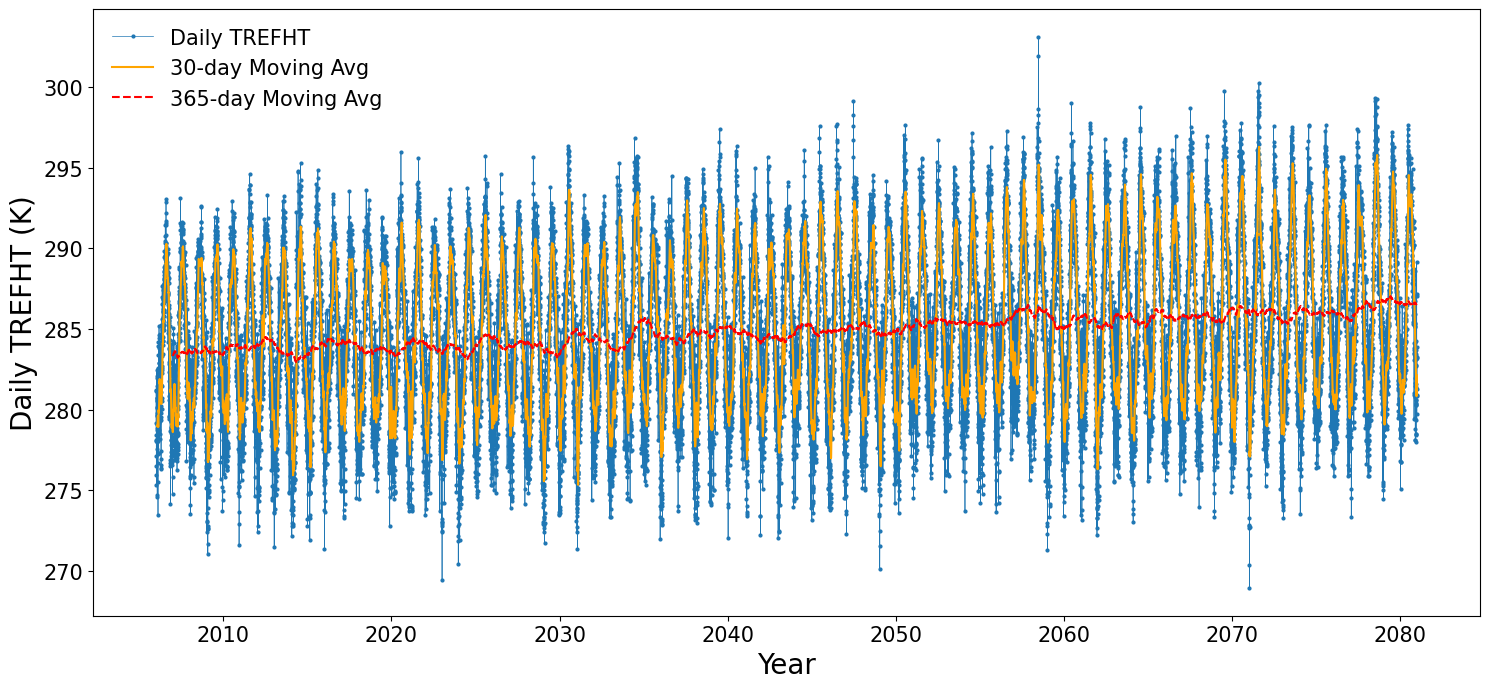

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Compute the long-term trend of daily TREFHT

plt.figure(figsize=(15, 7))
plt.plot(climate_data.index, climate_data['TREFHT'], marker='o', linestyle='-', linewidth=0.5, markersize=2, label="Daily TREFHT")

# Add moving averages (30-day and 365-day)
climate_data['TREFHT_30d'] = climate_data['TREFHT'].rolling(window=30).mean()
climate_data['TREFHT_365d'] = climate_data['TREFHT'].rolling(window=365).mean()
plt.plot(climate_data.index, climate_data['TREFHT_30d'], color='orange', label="30-day Moving Avg")
plt.plot(climate_data.index, climate_data['TREFHT_365d'], color='red', linestyle='--', label="365-day Moving Avg")

# Add labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Daily TREFHT (K)', fontsize=20)
plt.legend(loc="upper left", fontsize=15, frameon=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

#### Fighre 2. Daily reference height temperature (TREFHT) trend with moving averages.

The daily average temperature exhibits a seasonal cyclical pattern each year, with higher temperatures in summer and lower temperatures in winter, aligning with the typical seasonal climate variation.

The 365-day moving average curve shows a gradual upward trend overall, which may indicate a warming trend in future daily average temperatures.

Estimated Temperature Change Rate for Daily TREFHT: 0.0401 K/year


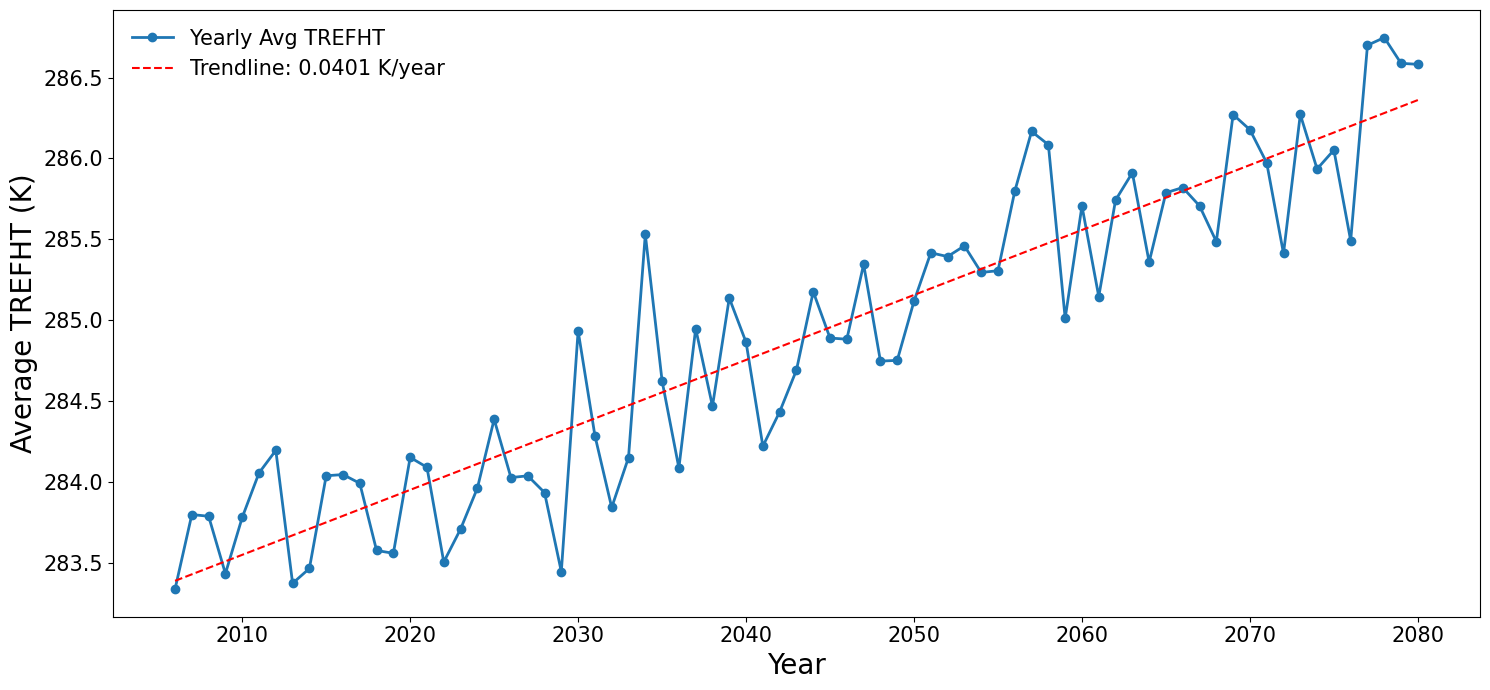

In [13]:
from sklearn.linear_model import LinearRegression

# Compute the annual average TREFHT and perform linear regression analysis

# Calculate the annual average TREFHT
climate_data['year'] = climate_data.index.year
yearly_trend = climate_data.groupby('year')['TREFHT'].mean().reset_index()

# Perform linear regression
X = np.array(yearly_trend['year']).reshape(-1, 1)
y = yearly_trend['TREFHT']
model = LinearRegression()
model.fit(X, y)

# Compute the trendline
trendline = model.predict(X)

# Output the temperature change rate
print(f"Estimated Temperature Change Rate for Daily TREFHT: {model.coef_[0]:.4f} K/year")

# Plot the annual temperature trend
plt.figure(figsize=(15, 7))
plt.plot(yearly_trend['year'], yearly_trend['TREFHT'], marker='o', linestyle='-', linewidth=2, markersize=6, label="Yearly Avg TREFHT")
plt.plot(yearly_trend['year'], trendline, linestyle='--', color='red', label=f'Trendline: {model.coef_[0]:.4f} K/year')

# Add labels and title
plt.xlabel('Year',fontsize=20)
plt.ylabel('Average TREFHT (K)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=False, fontsize=15)
plt.tight_layout()
plt.show()

#### Fighre 3. Yearly trend of reference height temperature (TREFHT).

This plot shows a consistent upward trend in the daily average temperature from 2006 to 2080. The estimated yearly temperature increase is 0.0401 K/year, leading to a total rise of approximately 2.96 K by 2080, indicating a clear warming trend.

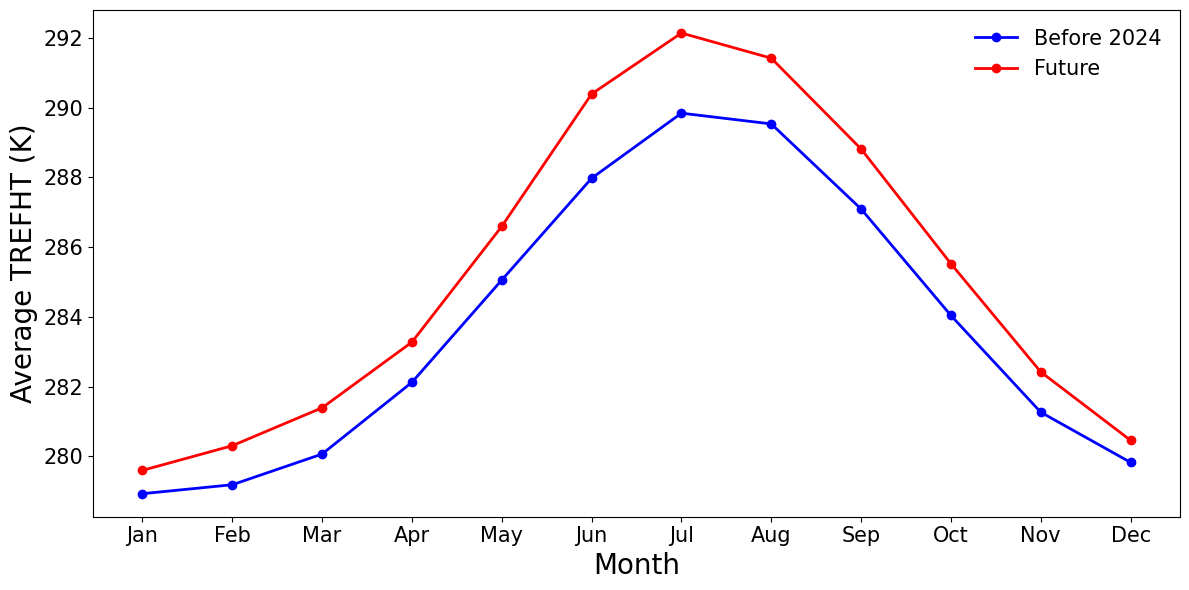

In [14]:
# Split the dataset
historical_data = climate_data[climate_data.index.year < 2024]  # Observed data before 2024
future_data = climate_data[climate_data.index.year >= 2024]  # Future projections from 2024 onwards

# Calculate the monthly average TREFHT
historical_monthly = historical_data.groupby(historical_data.index.month)['TREFHT'].mean()
future_monthly = future_data.groupby(future_data.index.month)['TREFHT'].mean()

# Plot the seasonal comparison
plt.figure(figsize=(12, 6))
plt.plot(historical_monthly.index, historical_monthly.values, marker='o', linestyle='-', linewidth=2, markersize=6, color='blue', label="Before 2024")
plt.plot(future_monthly.index, future_monthly.values, marker='o', linestyle='-', linewidth=2, markersize=6, color='red', label="Future")

# Add labels and title
plt.xlabel('Month', fontsize=20)
plt.ylabel('Average TREFHT (K)', fontsize=20)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(frameon=False, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

# Display the plot
plt.show()

#### Fighre 4. Comparison of seasonal variation of TREFHT.

The seasonal pattern remains unchanged, with summer being the hottest and winter the coldest, indicating that the climate cycle is still primarily driven by the same natural factors (e.g., solar radiation).

Future temperatures are generally 1K - 2K higher compared to those before 2024, suggesting a clear warming trend that affects the entire year.

The greatest increase in daily average temperature occurs in summer, with future temperatures being approximately 1.5K - 2K higher than those before 2024.

The temperature increase in winter is relatively smaller, but still higher by approximately 0.8K - 1.2K.

### 4.2 Analyze of the variation in daily maximum temperature 

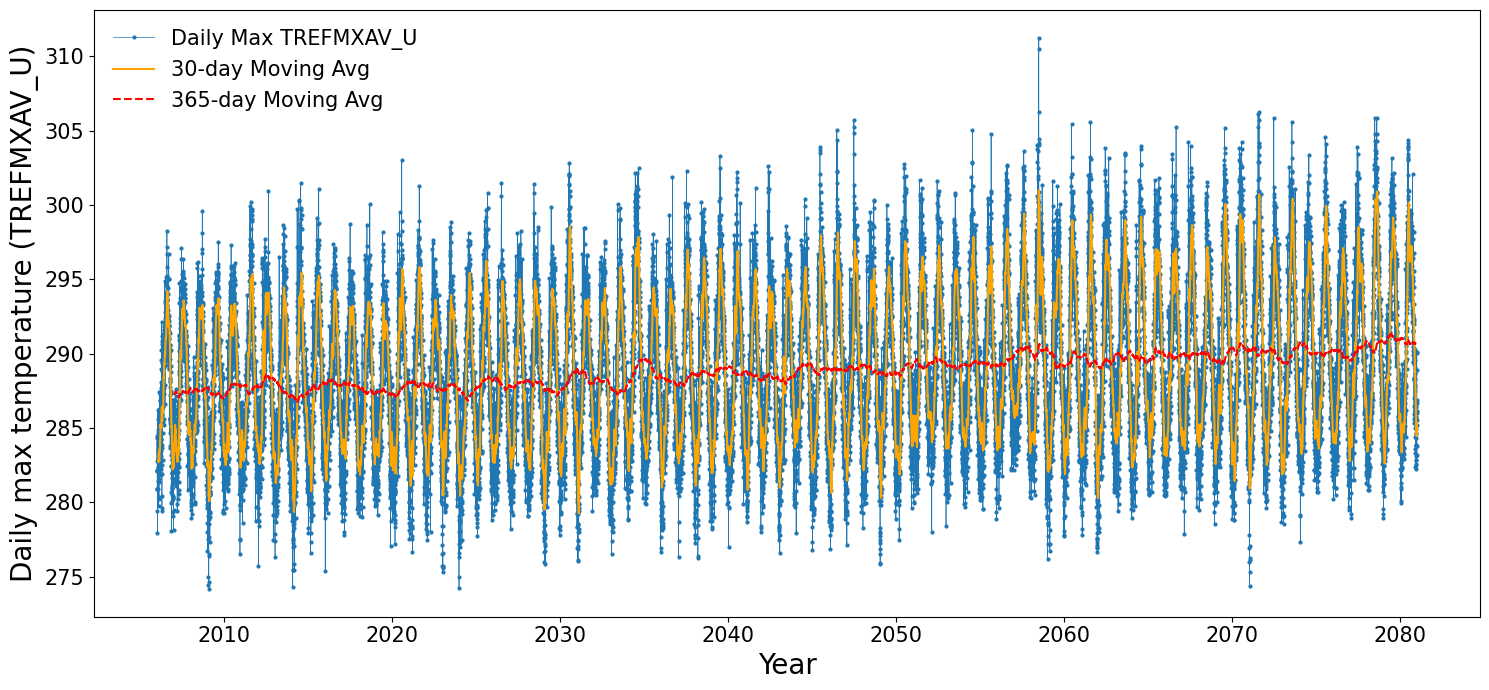

In [15]:
# 1. Compute the long-term trend of TREFMXAV_U

plt.figure(figsize=(15, 7))
plt.plot(climate_data.index, climate_data['TREFMXAV_U'], marker='o', linestyle='-', linewidth=0.5, markersize=2, label="Daily Max TREFMXAV_U")

# Add moving averages (30-day and 365-day)
climate_data['TREFMXAV_U_30d'] = climate_data['TREFMXAV_U'].rolling(window=30).mean()
climate_data['TREFMXAV_U_365d'] = climate_data['TREFMXAV_U'].rolling(window=365).mean()
plt.plot(climate_data.index, climate_data['TREFMXAV_U_30d'], color='orange', label="30-day Moving Avg")
plt.plot(climate_data.index, climate_data['TREFMXAV_U_365d'], color='red', linestyle='--', label="365-day Moving Avg")

# Add labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Daily max temperature (TREFMXAV_U)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="upper left", fontsize=15, frameon=False)
plt.tight_layout()


plt.show()

#### Figure 5. Daily max temperature (TREFMXAV_U) trend with moving averages.

Similar to the daily mean temperature (TREFHT), the daily maximum temperature (TREFMXAV_U) exhibits seasonal fluctuations, with a stable pattern of high temperatures in summer and low temperatures in winter.

The long-term trend indicates a gradual increase in daily maximum temperature.

Future high-temperature peaks may be higher than the present, suggesting a potential increase in extreme heat events (heatwaves).


Estimated Temperature Change Rate (Yearly Mean): 0.0449 K/year
Estimated Temperature Change Rate (Yearly Max): 0.0914 K/year


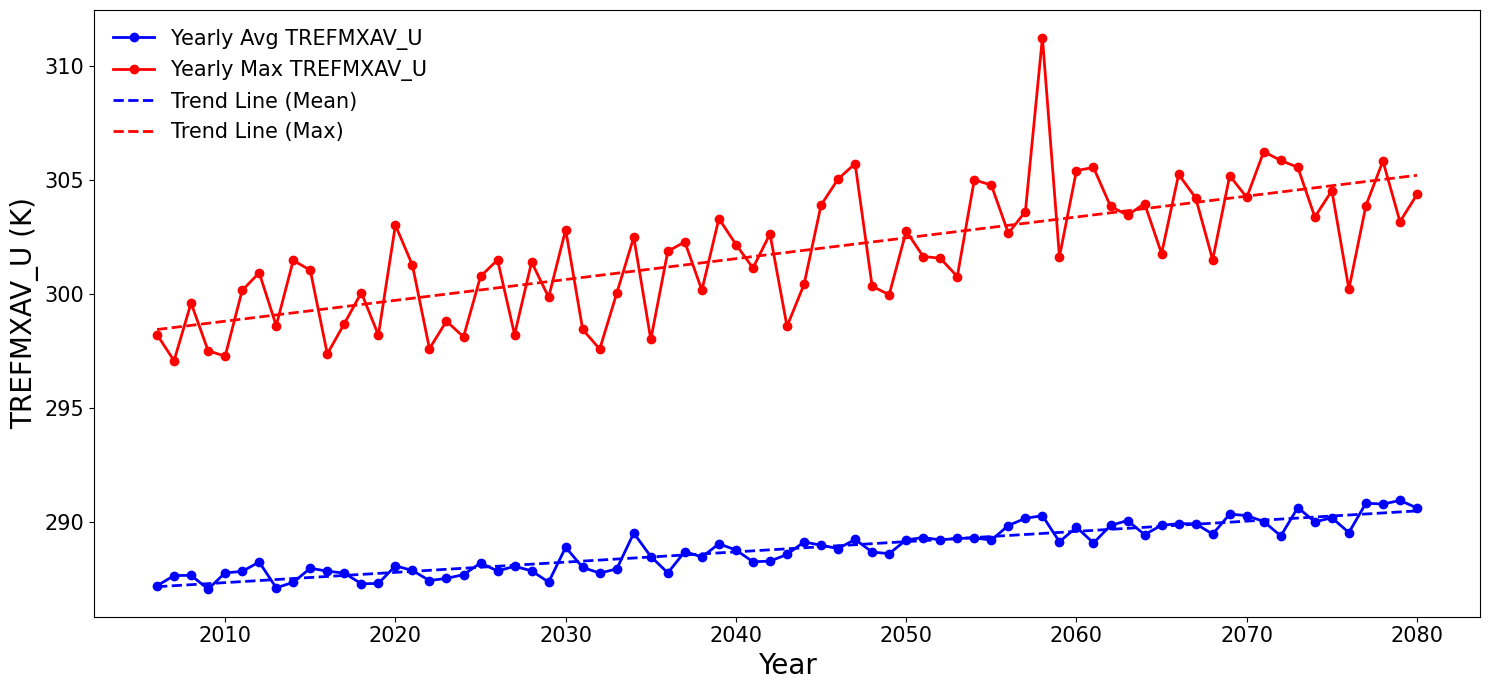

In [16]:
# Compute the annual mean and maximum values of TREFMXAV_U
yearly_mean = climate_data.groupby(climate_data.index.year)['TREFMXAV_U'].mean()
yearly_max = climate_data.groupby(climate_data.index.year)['TREFMXAV_U'].max()

# Create figure
plt.figure(figsize=(15, 7))

# Plot the yearly average temperature trend
plt.plot(yearly_mean.index, yearly_mean.values, marker='o', linestyle='-', linewidth=2, markersize=6, label="Yearly Avg TREFMXAV_U", color='blue')

# Plot the yearly maximum temperature trend
plt.plot(yearly_max.index, yearly_max.values, marker='o', linestyle='-', linewidth=2, markersize=6, label="Yearly Max TREFMXAV_U", color='red')

# Compute trend lines for yearly mean and yearly max temperatures (linear regression)
X = np.array(yearly_mean.index).reshape(-1, 1)
y_mean = yearly_mean.values
y_max = yearly_max.values

model_mean = LinearRegression().fit(X, y_mean)
model_max = LinearRegression().fit(X, y_max)

# Generate trend lines
trend_mean = model_mean.predict(X)
trend_max = model_max.predict(X)

# Output temperature change rate
print(f"Estimated Temperature Change Rate (Yearly Mean): {model_mean.coef_[0]:.4f} K/year")
print(f"Estimated Temperature Change Rate (Yearly Max): {model_max.coef_[0]:.4f} K/year")

# Plot trend lines
plt.plot(yearly_mean.index, trend_mean, linestyle='--', linewidth=2, color='blue', label="Trend Line (Mean)")
plt.plot(yearly_max.index, trend_max, linestyle='--', linewidth=2, color='red', label="Trend Line (Max)")

# Add labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('TREFMXAV_U (K)', fontsize=20)
plt.legend(loc="upper left", fontsize=15, frameon=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()

#### Figure 6. Yearly trend of daily max temperature (TREFMXAV_U): Mean vs. Max

Both the annual mean maximum temperature (blue) and the annual maximum temperature (red) exhibit an overall increasing trend.

The red curve highlights several anomalous temperature peaks, indicative of extreme heat events, particularly after 2060, where the fluctuations in maximum temperature become more pronounced. This suggests that future extreme weather events, such as heatwaves, may become more frequent and severe.

The increasing trend in the blue curve (0.0449 K/year) is relatively gradual, whereas the red curve (0.0914 K/year) demonstrates a more pronounced upward trajectory. This indicates that while overall temperature warming is occurring, the intensity and frequency of extreme heat events are escalating at a higher rate.

### 4.3 Identification of Potential Future Extreme Heat Events

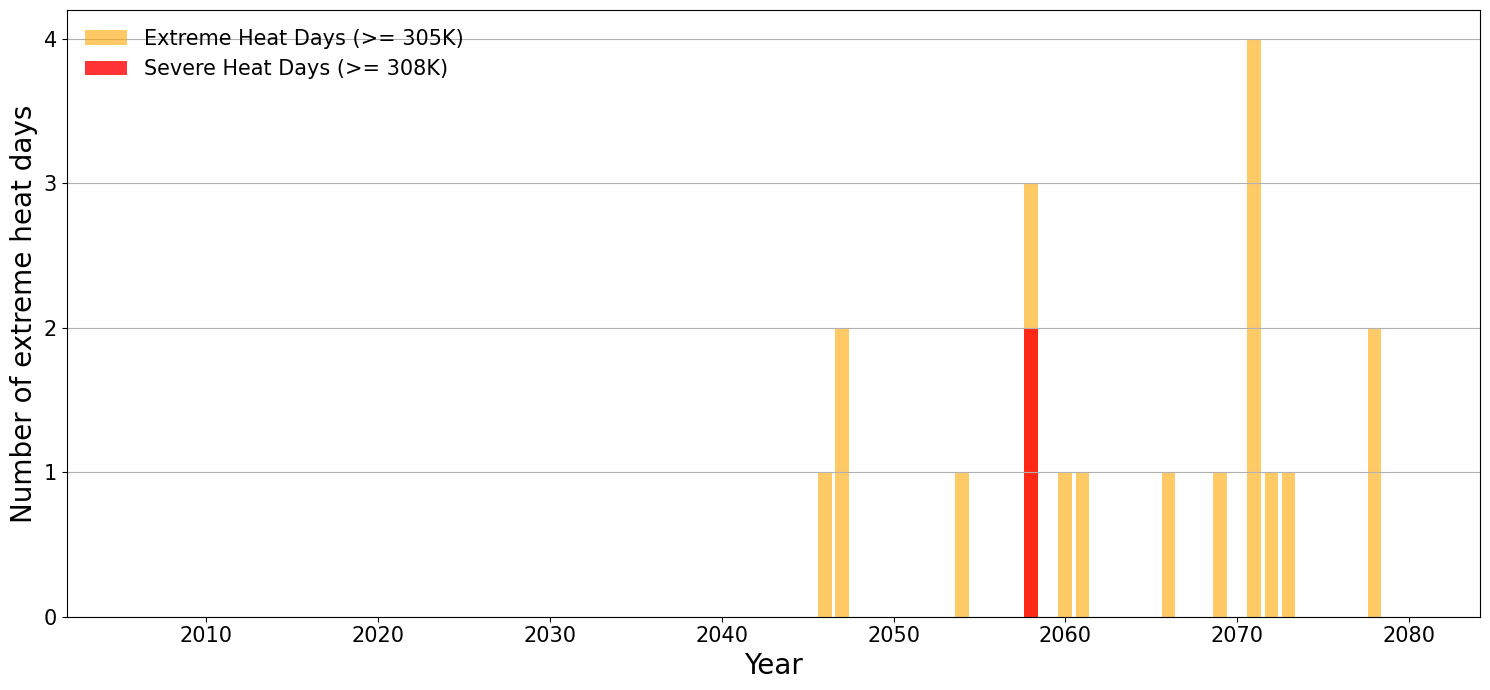

In [17]:
# Define new extreme heat thresholds
threshold_305K = 305  
threshold_308K = 308  

# Calculate the number of heatwave days
climate_data['heatwave_305K'] = climate_data['TREFMXAV_U'] >= threshold_305K
climate_data['heatwave_308K'] = climate_data['TREFMXAV_U'] >= threshold_308K

# Count the number of extreme heat days per year
heatwave_days_305K = climate_data.groupby(climate_data.index.year)['heatwave_305K'].sum()
heatwave_days_308K = climate_data.groupby(climate_data.index.year)['heatwave_308K'].sum()

# Plot the trend of extreme heat days
plt.figure(figsize=(15, 7))
plt.bar(heatwave_days_305K.index, heatwave_days_305K.values, color='orange', alpha=0.6, label='Extreme Heat Days (>= 305K)')
plt.bar(heatwave_days_308K.index, heatwave_days_308K.values, color='red', alpha=0.8, label='Severe Heat Days (>= 308K)')

# Add labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of extreme heat days', fontsize=20)
plt.yticks(range(0, int(max(heatwave_days_305K.max(), heatwave_days_308K.max())) + 1))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=False, fontsize=15)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

#### Figure 7. Identification of extreme heat days (TREFMXAV_U >= 305K and >= 308K)

The number of high-temperature days exceeding 305K will increase significantly after 2050, indicating that high-temperature weather will become more frequent in the future.

Prolonged high-temperature events lasting several days may occur after 2060.

Days with temperatures exceeding 308K appear only around 2060, with almost no extreme temperatures surpassing 308K in other years.

This suggests that while high-temperature weather may become more frequent in the future, extreme heatwaves (>308K) may remain relatively rare.

### 4.4 Analysis of influential factors

#### 4.4.1 Analysis of factors influencing daily maximum temperature

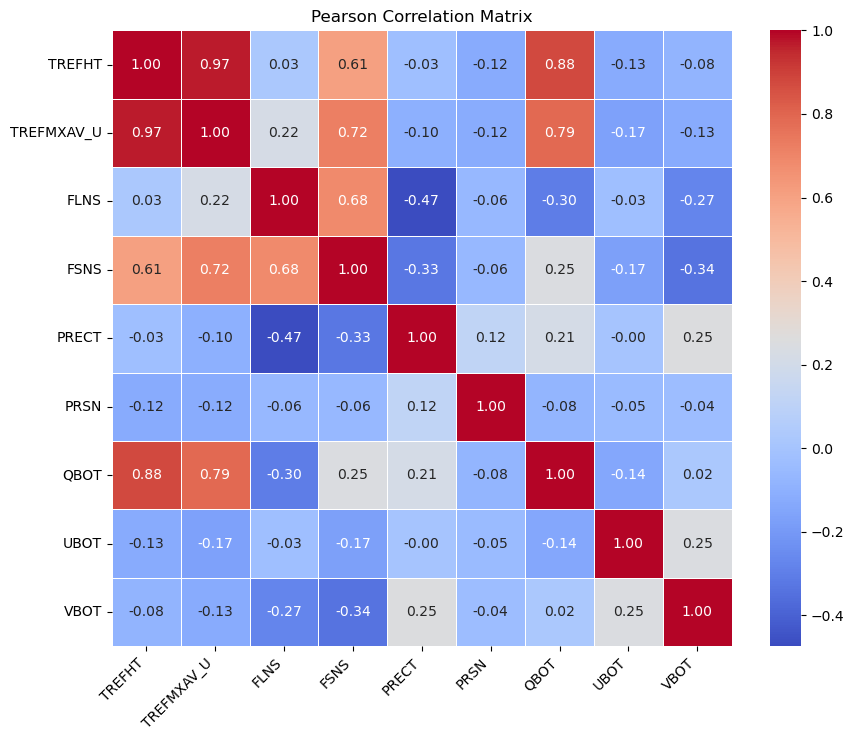

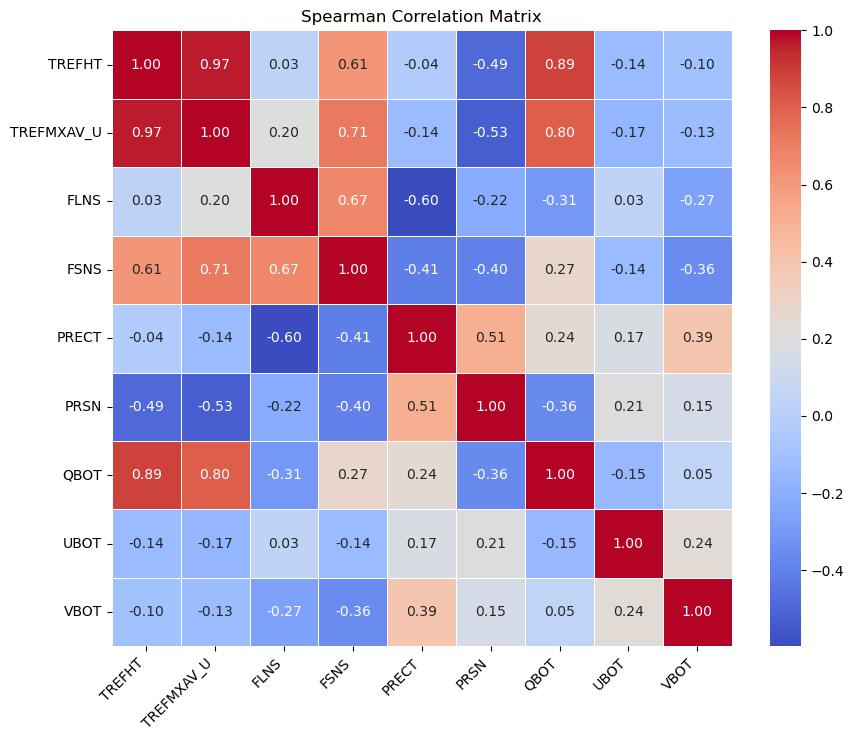

In [20]:
import seaborn as sns

# Select TREFHT and other related variables
correlation_vars = ['TREFHT', 'TREFMXAV_U', 'FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT', 'UBOT', 'VBOT']

# Compute the correlation matrix
correlation_matrix = climate_data[correlation_vars].corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.title("Pearson Correlation Matrix")
plt.show()

# Compute the Spearman correlation matrix
correlation_matrix = climate_data[correlation_vars].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.title("Spearman Correlation Matrix")
plt.show()

#### Figure 8. Correlation analysis among variables (Pearson and Spearman).

The correlation between TREFHT and TREFMXAV_U (0.97) is extremely high, indicating that the overall temperature trend is highly consistent with the trend of daily maximum temperature.

TREFMXAV_U has a strong positive correlation with FSNS (0.72 in Pearson and 0.71 in Spearman), indicating that as FSNS increases (i.e., the surface absorbs more solar energy), TREFMXAV_U also rises. This suggests that solar radiation is a key driving factor for extreme heat events.

TREFMXAV_U exhibits a strong positive correlation with QBOT (0.79 in Pearson and 0.80 in Spearman), indicating that an increase in humidity is generally associated with a rise in maximum temperature. This phenomenon may be attributed to thermoregulatory mechanisms in high-humidity environments (Horton et al., 2014).

The impact of PRSN is more pronounced in the nonlinear domain, as evidenced by the stronger Spearman correlation coefficient (-0.53). This suggests that snowfall may lead to a more significant cooling effect under extreme weather conditions (Henderson and Leathers, 2010). 

The nonlinear influence of other variables largely aligns with the Pearson correlation results, indicating that TREFMXAV_U is primarily governed by linear factors.

<Figure size 1200x800 with 0 Axes>

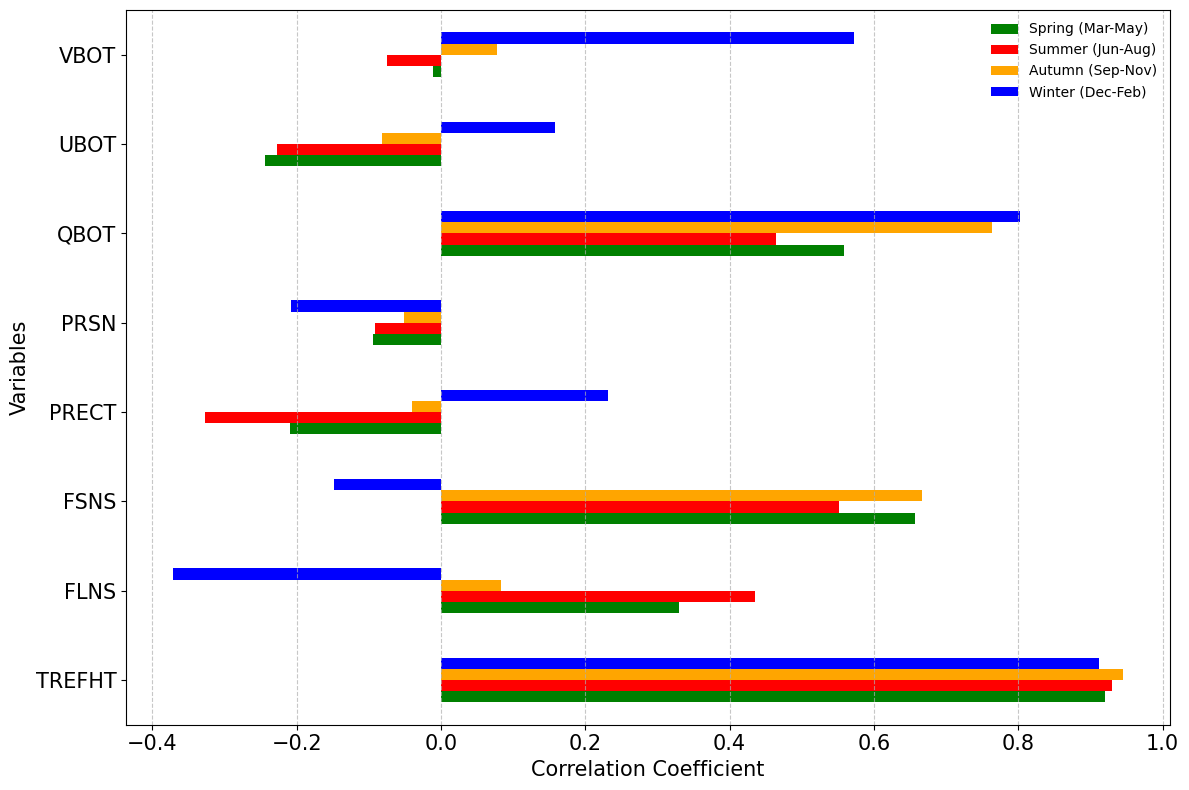

In [21]:
# Define four seasons
season_mapping = {
    'Spring': [3, 4, 5],   # Spring (March-May)
    'Summer': [6, 7, 8],   # Summer (June-August)
    'Autumn': [9, 10, 11], # Autumn (September-November)
    'Winter': [12, 1, 2]   # Winter (December-February)
}

# Create a DataFrame to store correlations for the four seasons
seasonal_correlation = pd.DataFrame()

# Calculate the correlation between TREFMXAV_U  and other variables for each season
for season, months in season_mapping.items():
    season_data = climate_data[climate_data.index.month.isin(months)]
    correlation = season_data[correlation_vars].corr()['TREFMXAV_U'].drop('TREFMXAV_U')
    seasonal_correlation[season] = correlation

# Plot a horizontal bar chart comparing TREFHT correlations across four seasons
plt.figure(figsize=(12, 8))
seasonal_correlation.plot(kind='barh', figsize=(12, 8), color=['green', 'red', 'orange', 'blue'])

# Add labels and title
plt.xlabel('Correlation Coefficient', fontsize=15)
plt.ylabel('Variables', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(['Spring (Mar-May)', 'Summer (Jun-Aug)', 'Autumn (Sep-Nov)', 'Winter (Dec-Feb)'], frameon=False, fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()


#### Figure 9. Comparison of TREFMXAV_U correlation with other meteorological variables across four seasons

QBOT: The correlation remains high in all seasons (around 0.5-0.8), indicating that air humidity has a significant impact on daily maximum temperature. The correlation is highest in winter, possibly because humidity variations play a more crucial role in regulating temperature during this season.

FLNS: Exhibits a strong negative correlation in winter, suggesting that the cooling effect of longwave radiation is more pronounced during this season (Hoch et al., 2007).

FSNS: Exhibits a strong positive correlation in spring, summer, and autumn, suggesting that clear skies or intense solar radiation may contribute to the occurrence of extreme heat events. However, in winter (blue), a significant negative correlation is observed, indicating that an increase in solar radiation may not directly result in a rise in temperature during this season.

PRSN: Displays a clear negative correlation with temperature in winter, which aligns with the climatic characteristic that heavy snowfall is usually associated with lower temperatures.

VBOT: Exhibits the most significant impact in winter, indicating that under the influence of the North Atlantic Drift, southerly winds in winter are often associated with milder weather. In contrast, when northerly winds intensify, the region is affected by cold air advection from the Arctic or Scandinavia, leading to a decrease in temperature (Perry and Hollis, 2005).

In summer, daily maximum temperature is primarily controlled by QBOT, FLNS and FSNS, whereas in winter, daily maximum temperature is more influenced by QBOT, FLNS, and VBOT.

#### 4.4.2 Analysis factors contributing to extreme heat events

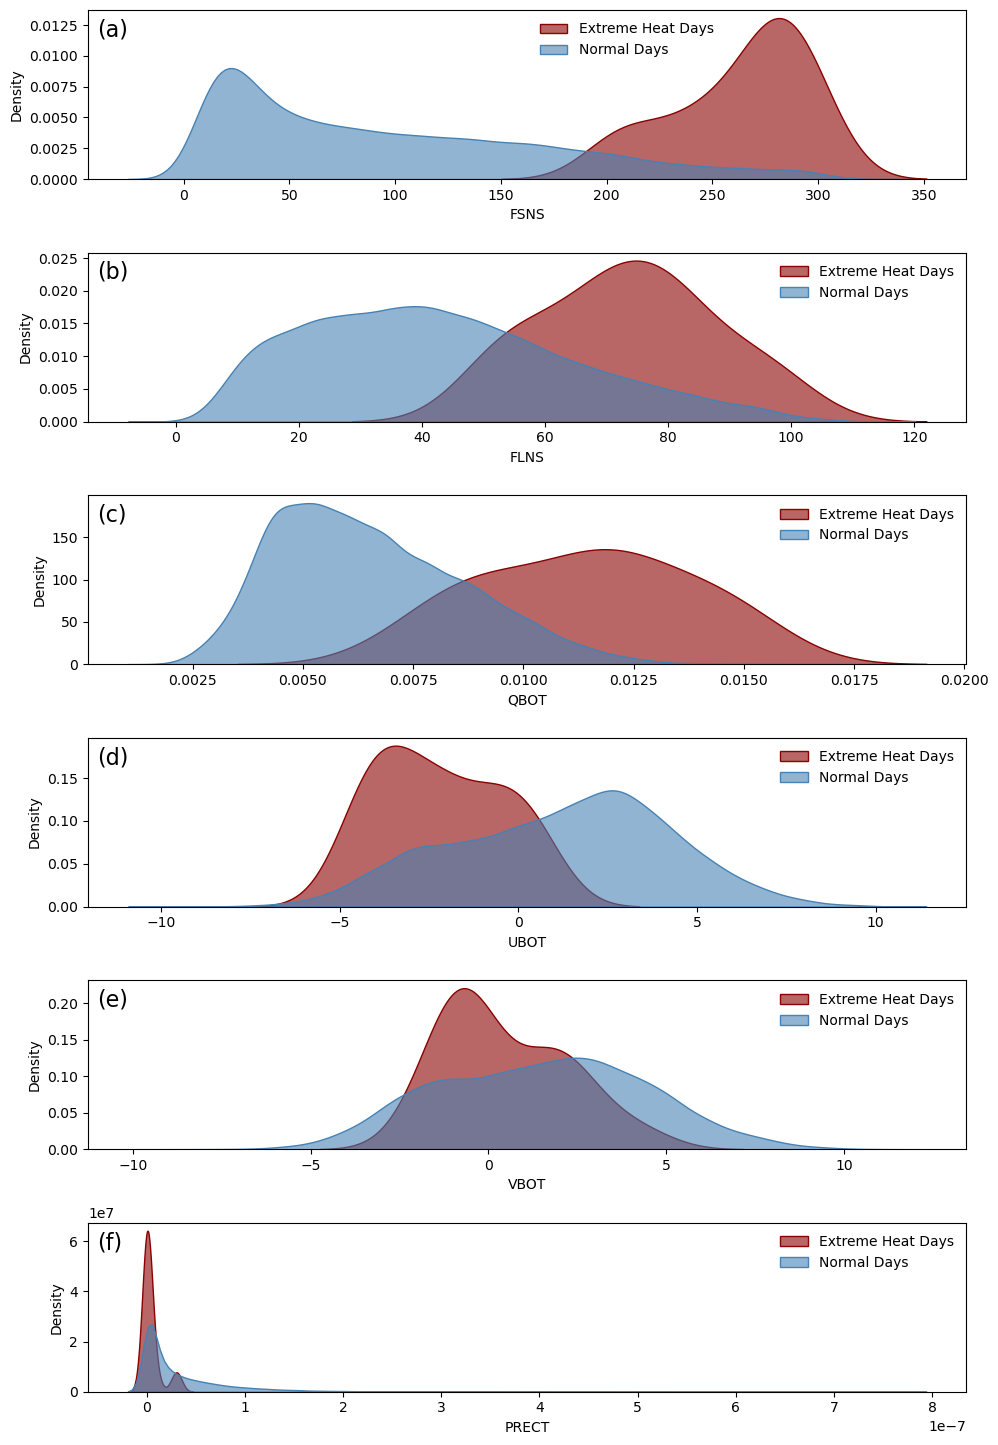

In [22]:
variables_of_interest = ['TREFMXAV_U', 'FSNS', 'FLNS', 'QBOT', 'UBOT', 'VBOT', 'PRECT']

# Select extreme heat days and normal temperature days using the normalized threshold
extreme_heat_data = climate_data[climate_data['TREFMXAV_U'] >= 305]
normal_temp_data = climate_data[climate_data['TREFMXAV_U'] < 305]

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(variables_of_interest[1:]), ncols=1, figsize=(10, 15))

for i, var in enumerate(variables_of_interest[1:]):
    sns.kdeplot(extreme_heat_data[var], fill=True, color='darkred', label='Extreme Heat Days', ax=axes[i], alpha=0.6)
    sns.kdeplot(normal_temp_data[var], fill=True, color='steelblue', label='Normal Days', ax=axes[i], alpha=0.6)
    
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Density')
    
    # Move legend to the left for the first subplot
    if i == 0:
        axes[i].legend(frameon=False, loc='upper left', bbox_to_anchor=(0.5, 1))
    else:
        axes[i].legend(frameon=False)
    
    # Add subplot label inside the top-left corner of the plot
    axes[i].text(0.01, 0.95, f'({chr(97 + i)})', transform=axes[i].transAxes, fontsize=16, va='top', ha='left')

# Add a title to the entire figure
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Display the plot
plt.show()

#### Figure 10. Distribution of meteorological variables during extreme heat days vs normal days.

Extreme heat days exhibit significantly higher FSNS compared to normal days, indicating that extreme heat events are more likely to occur under clear-sky conditions. Reduced cloud cover enhances solar radiation absorption at the surface, thereby increasing surface heating.

Extreme heat days are characterized by higher FLNS, suggesting enhanced atmospheric absorption of longwave radiation. This leads to a reduction in nocturnal cooling efficiency, preventing surface heat dissipation and further increasing air temperature.

The QBOT on extreme heat days is notably higher than that on normal days, indicating that elevated humidity may contribute to the persistence and intensification of high temperatures. In humid environments, water vapor enhances the greenhouse effect, thereby elevating air temperature. Additionally, high humidity reduces evaporative cooling efficiency, making it more difficult for the atmosphere to cool down.

During extreme heat days, UBOT is predominantly negative, suggesting that such events may be associated with stronger westerly winds.The strengthening of westerly winds may indicate that the study area is under the influence of the Subtropical High, leading to the advection of warm and dry air from southern or central Europe into the region (Woollings et al., 2018).

Extreme heat days are typically accompanied by lower precipitation levels, as rainfall generally contributes to surface cooling through evaporative processes.

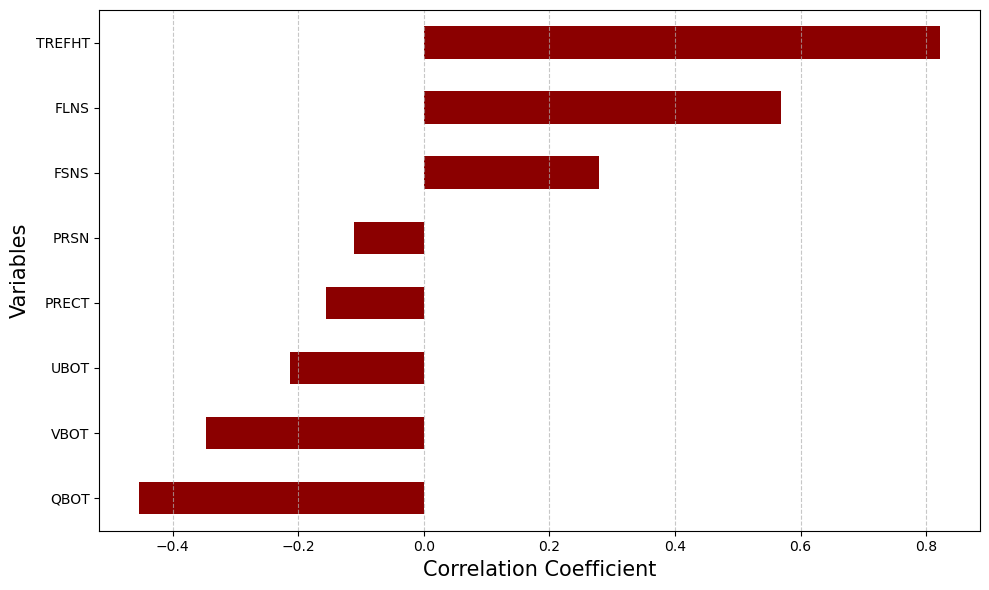

In [23]:
# Define extreme heat threshold (TREFMXAV_U > 305K)
extreme_temp_data = climate_data[climate_data['TREFMXAV_U'] >= 305]

# Compute the correlation matrix under extreme heat conditions
selected_vars = ['TREFHT', 'TREFMXAV_U','FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT', 'UBOT', 'VBOT']
extreme_correlation = extreme_temp_data[selected_vars].corr()['TREFMXAV_U'].drop('TREFMXAV_U')

# Plot correlation of TREFHT with other variables under extreme heat conditions
plt.figure(figsize=(10, 6))
extreme_correlation.sort_values().plot(kind='barh', color='darkred')

# Add labels and title
plt.xlabel('Correlation Coefficient', fontsize=15)
plt.ylabel('Variables', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#### Figure 11.Correlation of TREFMXAV_U with Other Variables under Extreme Heat Conditions (TREFMXAV_U >= 305K).

FLNS: exhibits a strong positive correlation (0.56), indicating that as longwave radiation increases, extreme heat temperatures may also rise. This may be due to the enhanced greenhouse effect, which increases heat accumulation at the surface, thereby promoting the formation and persistence of extreme heat events.

FSNS: exhibits a correlation coefficient of 0.28, indicating a moderate relationship between increased solar shortwave radiation and the rise in maximum temperature. This suggests that clear weather conditions or enhanced solar radiation may contribute to the occurrence of extreme heat events.

QBOT: exhibits a strong negative correlation (-0.45), indicating that while extreme heat events typically occur in relatively humid environments, higher humidity may actually correspond to lower maximum temperatures. This phenomenon may be attributed to the fact that extreme heat days with higher humidity are often accompanied by increased cloud cover, which reduces surface shortwave radiation (FSNS), thereby lowering the daily maximum temperature (Fischer et al., 2007).

VBOT: exhibits a correlation coefficient of -0.35, indicating that under extreme heat conditions, an increase in northerly winds may intensify high temperatures, potentially by reducing cloud cover, thereby enhancing surface shortwave radiation and leading to higher daytime maximum temperatures.

### 4.4.3 Analysis of representative years

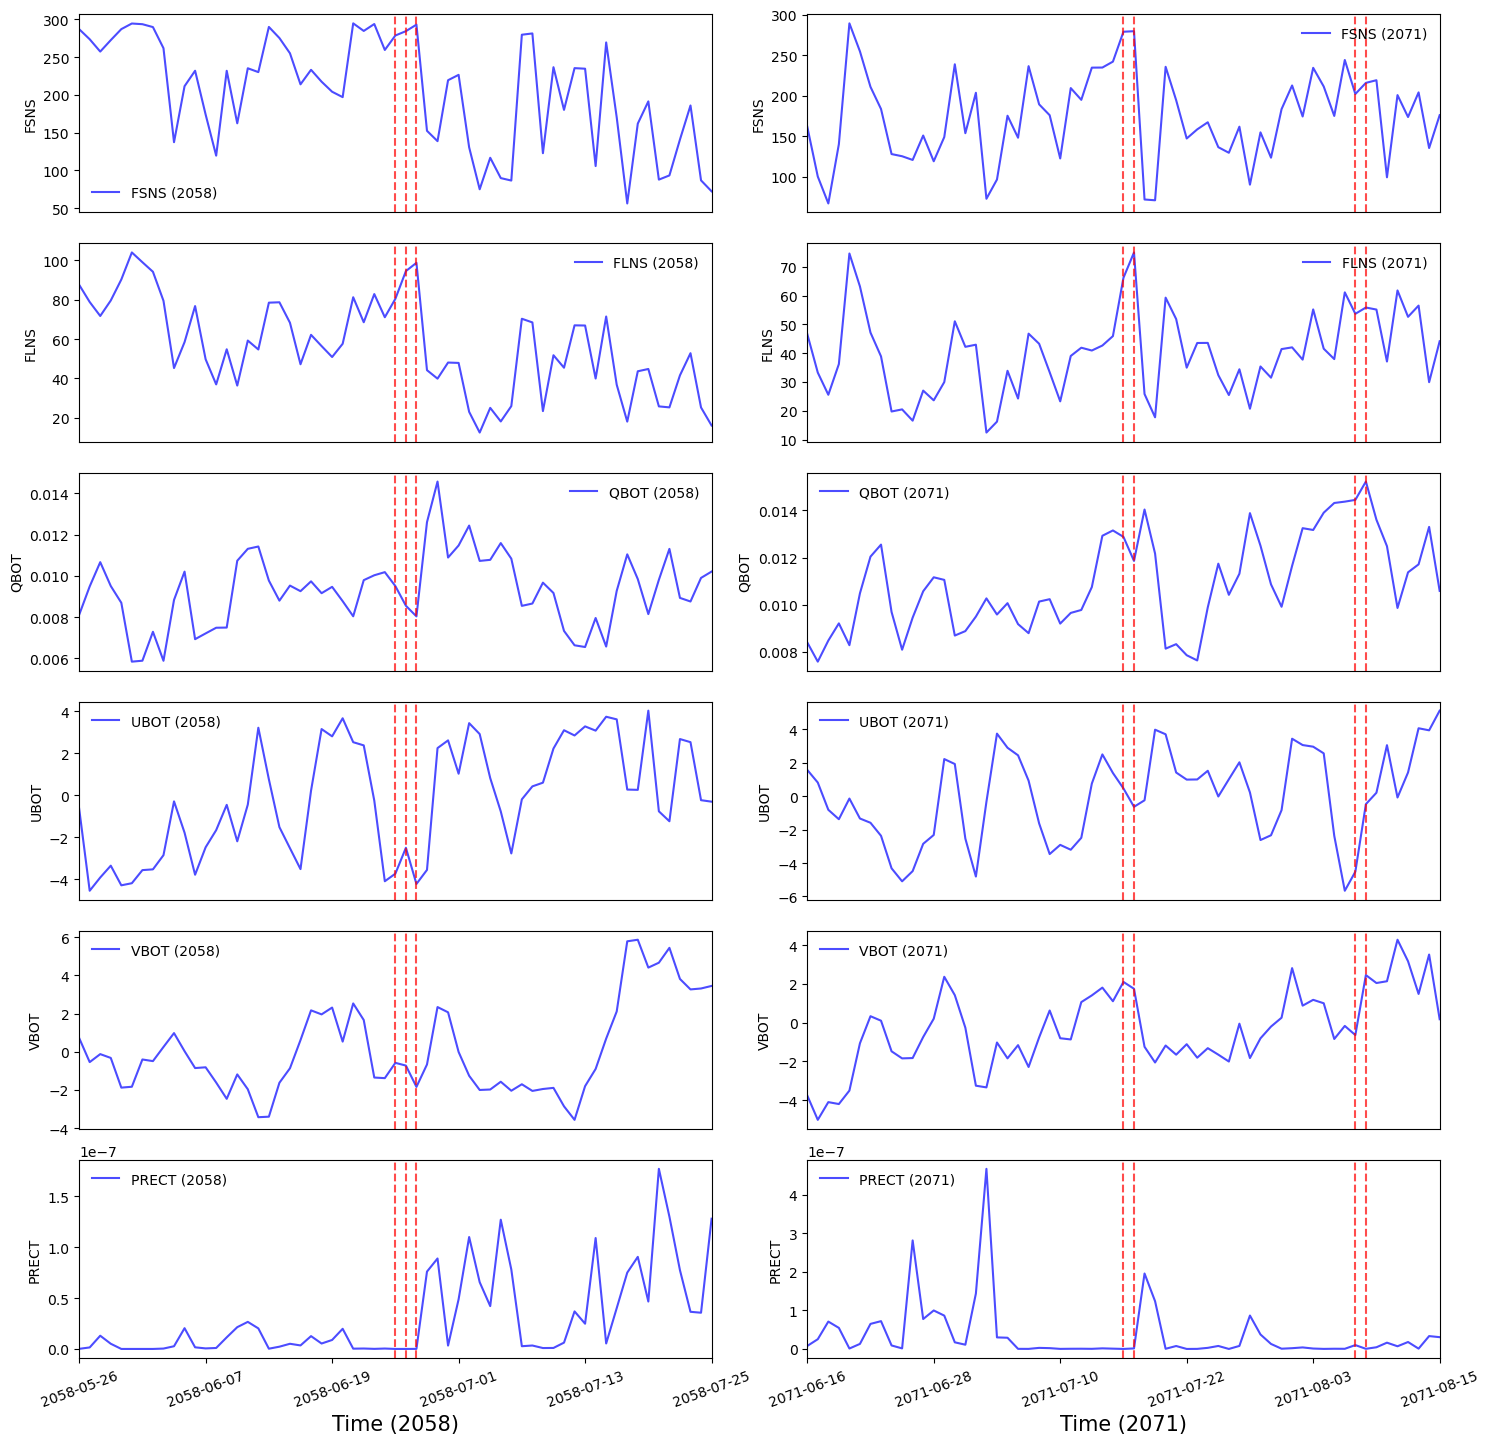

In [153]:
# Select data for the years 2058 and 2071
year_2058_data = climate_data[climate_data.index.year == 2058]
year_2071_data = climate_data[climate_data.index.year == 2071]

# Filter extreme heat days in 2058 and 2071 (TREFMXAV_U > 305K)
extreme_days_2058 = year_2058_data[year_2058_data['TREFMXAV_U'] >= 305].index
extreme_days_2071 = year_2071_data[year_2071_data['TREFMXAV_U'] >= 305].index

# Define function to plot data
def plot_extreme_heat_data(year_data, extreme_days, year, axes, col):
    if extreme_days.empty:
        print(f"No extreme heat days (TREFMXAV_U > 305K) found in {year}.")
        return
    
    # Select the first extreme heat day as the reference date
    base_date = extreme_days[0]
    
    # Extract data for 30 days before and after the reference date
    start_date = base_date - pd.Timedelta(days=30)
    end_date = base_date + pd.Timedelta(days=30)
    analysis_data = year_data.loc[start_date:end_date]
    
    # Select variables to plot
    variables_to_plot = ['FSNS', 'FLNS', 'QBOT', 'UBOT', 'VBOT', 'PRECT']
    
    for i, var in enumerate(variables_to_plot):
        axes[i, col].plot(analysis_data.index, analysis_data[var], label=f'{var} ({year})', alpha=0.7, color='b')
        
        # Add markers for all extreme heat days
        for extreme_date in extreme_days:
            if start_date <= extreme_date <= end_date:  # Ensure markers are within the visible range
                axes[i, col].axvline(extreme_date, color='red', linestyle='--', alpha=0.7)
        
        axes[i, col].set_ylabel(var, fontsize=10)
        axes[i, col].legend(frameon=False, fontsize=10)
        axes[i, col].set_xlim([start_date, end_date])  # Explicitly setting the X-axis range
        
        # Hide x-axis labels and ticks for all but the last row
        if i != len(variables_to_plot) - 1:
            axes[i, col].set_xticks([])
            axes[i, col].set_xticklabels([])
        else:
            axes[i, col].set_xticks(pd.date_range(start=start_date, end=end_date, periods=6))
            axes[i, col].tick_params(axis='x', rotation=20)

# Create subplots with two columns (one for each year)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 15), sharex=False)

# Plot data for 2058 in the first column
plot_extreme_heat_data(year_2058_data, extreme_days_2058, 2058, axes, col=0)

# Plot data for 2071 in the second column
plot_extreme_heat_data(year_2071_data, extreme_days_2071, 2071, axes, col=1)

# Add labels and title
axes[-1, 0].set_xlabel('Time (2058)',fontsize=15)
axes[-1, 1].set_xlabel('Time (2071)',fontsize=15)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.show()

#### Figure 12. Meteorological variables 30 days before and after extreme heat days in 2058 and 2071.

Before extreme high-temperature days, FSNS is at a relatively high level and exhibits a significant upward trend, indicating that intense solar radiation may be a key driver of extreme heat events.

Prior to extreme heat events, FLNS remains at a high level and shows a noticeable increasing trend, suggesting that enhanced atmospheric absorption of longwave radiation reduces nighttime cooling effects, making it easier for high temperatures to persist.

Before extreme heat events, QBOT is relatively high, but it does not exhibit a consistent upward trend. This indicates that increased humidity may be an accompanying phenomenon of extreme heat events; however, a sustained increase in humidity does not necessarily imply prolonged high temperatures.

The extreme heat events in 2058 and 2071 are both dominated by westerly winds. The 2058 event is accompanied by weaker northerly winds, whereas the 2071 event is associated with weaker southerly winds, suggesting that VBOT is not a decisive factor in extreme heat events.

Precipitation is relatively low on extreme high-temperature days, and such events typically occur under dry conditions.

## 6. Conclusion

This project employs a comprehensive data-driven approach to investigate the trends in daily mean temperature and daily maximum temperature in the study area from January 2, 2006, to December 31, 2080. The analysis aims to identify potential future extreme heat events and examine the driving factors contributing to their occurrence. The key findings are as follows:

(1) Both the daily average temperature and daily maximum temperature in the study area exhibit an increasing trend. The seasonal pattern of future climate remains unchanged, with the greatest increase in daily average temperature occurring in summer.

(2) The rate of increase in the annual maximum temperature is twice that of the annual mean daily maximum temperature, indicating that while the overall temperature is rising, the intensity and frequency of extreme heat events are increasing at a much faster rate.

(3) The number of high-temperature days exceeding 305K will increase significantly after 2050, suggesting that high-temperature weather will become more frequent in the future. Prolonged high-temperature events lasting several days may occur after 2060. Although high-temperature weather is expected to become more frequent, extreme heatwaves (>308K) may still remain relatively rare.

(4) In summer, the daily maximum temperature is primarily influenced by QBOT, FLNS, and FSNS, whereas in winter, it is predominantly controlled by QBOT, FLNS, and VBOT.

(5) Extreme heat events typically occur under clear-sky conditions (high FSNS), with enhanced atmospheric longwave radiation (high FLNS), elevated humidity levels (high QBOT), stronger westerly winds (negative UBOT), and reduced precipitation. These factors collectively contribute to the formation and persistence of high temperatures.

(6) The intensification of longwave radiation (FLNS) and shortwave solar radiation (FSNS) serves as the primary driving force behind extreme heat events. Higher humidity (QBOT) may suppress surface shortwave radiation by increasing cloud cover, thereby lowering the maximum temperature. Meanwhile, stronger northerly winds (VBOT) may further exacerbate high temperatures by reducing cloud cover, although this effect is not particularly significant.

## Reference

Carter, J.G., Cavan, G., Connelly, A., Guy, S., Handley, J., Kazmierczak, A., 2015. Climate change and the city: Building capacity for urban adaptation. Progress in Planning 95, 1–66. https://doi.org/10.1016/j.progress.2013.08.001

Fischer, E.M., Seneviratne, S.I., Vidale, P.L., Lüthi, D., Schär, C., 2007. Soil Moisture–Atmosphere Interactions during the 2003 European Summer Heat Wave. Journal of Climate 20, 5081–5099. https://doi.org/10.1175/JCLI4288.1

Hall, J.M., Handley, J.F., Ennos, A.R., 2012. The potential of tree planting to climate-proof high density residential areas in Manchester, UK. Landscape and Urban Planning 104, 410–417. https://doi.org/10.1016/j.landurbplan.2011.11.015

Henderson, G.R., Leathers, D.J., 2010. European snow cover extent variability and associations with atmospheric forcings. Intl Journal of Climatology 30, 1440–1451. https://doi.org/10.1002/joc.1990

Hoch, S.W., Calanca, P., Philipona, R., Ohmura, A., 2007. Year-Round Observation of Longwave Radiative Flux Divergence in Greenland. Journal of Applied Meteorology and Climatology 46, 1469–1479. https://doi.org/10.1175/JAM2542.1

Horton, D.E., Skinner, C.B., Singh, D., Diffenbaugh, N.S., 2014. Occurrence and persistence of future atmospheric stagnation events. Nature Clim Change 4, 698–703. https://doi.org/10.1038/nclimate2272

IPCC (2013) Summary for Policymakers. In: Stocker, T.F., Qin, D., Plattner, G.-K., Tignor, M., Allen, S.K., Boschung, J., Nauels, A., Xia, Y., Bex, V. and Midgley, P.M. (eds.) Climate Change 2013: The Physical Science Basis. Contribution of Working Group I to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change. Cambridge: Cambridge University Press.

Kay, J.E., Deser, C., Phillips, A., Mai, A., Hannay, C., Strand, G., Arblaster, J.M., Bates, S.C., Danabasoglu, G., Edwards, J., Holland, M., Kushner, P., Lamarque, J.-F., Lawrence, D., Lindsay, K., Middleton, A., Munoz, E., Neale, R., Oleson, K., Polvani, L., Vertenstein, M., 2015. The Community Earth System Model (CESM) Large Ensemble Project: A Community Resource for Studying Climate Change in the Presence of Internal Climate Variability. Bulletin of the American Meteorological Society 96, 1333–1349. https://doi.org/10.1175/BAMS-D-13-00255.1

Perry, M., Hollis, D., 2005. The generation of monthly gridded datasets for a range of climatic variables over the UK. Intl Journal of Climatology 25, 1041–1054. https://doi.org/10.1002/joc.1161

Woollings, T., Barriopedro, D., Methven, J., Son, S.-W., Martius, O., Harvey, B., Sillmann, J., Lupo, A.R., Seneviratne, S., 2018. Blocking and its Response to Climate Change. Curr Clim Change Rep 4, 287–300. https://doi.org/10.1007/s40641-018-0108-z